In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Input values
x = np.random.rand(100,1)
#Target values
t = []
for i in range(len(x)):
    t.append(x[i]**3-x[i]**2)
t= np.asarray(t)

In [3]:
#ReLU and ReLU derivative functions
def relu(x):
    return (np.where(x < 0.0, 0.0, x))
    
def der_relu(x):
    return (np.where(x < 0.0, 0.0, 1))

In [4]:
class Layer:
    
    def __init__(self, n_units:int, input_units:int) -> None:
         # weights
        self.weights = np.random.randn(input_units,n_units)
        # bias 
        self.biases = np.zeros(n_units)
        # empty attributes for layer input, preactivation, and activation
        self.layer_input = None
        self.layer_preactivation = None
        self.layer_activation = None
        
    def forward_step(self, inputs: np.array)-> np.array:
        self.layer_input = inputs
        # calculate the preactivation
        self.layer_preactivation = (self.layer_input @ self.weights) + self.biases
        # apply the activation function
        self.layer_activation = relu(self.layer_preactivation)
        return self.layer_activation
    
    def compute_gradients(self, dloss_dactivation: np.array) -> None:
        # calculate the gradient w.r.t. the weights
        self.dloss_dweights = self.layer_input.T @ (der_relu(self.layer_preactivation) * dloss_dactivation )
        # calculate the gradient w.r.t. the bias vector
        self.dloss_dbias = der_relu(self.layer_preactivation) * dloss_dactivation
        # compute the gradient w.r.t. the layer input
        self.dloss_dinput = (der_relu(self.layer_preactivation) * dloss_dactivation) @ self.weights.T

    def update_parameters(self,learning_rate: float) -> None:
        #update weights and biases
        self.biases = self.biases - (self.dloss_dbias * learning_rate)
        self.weights = self.weights - (self.dloss_dweights * learning_rate)

    def backward_step(self, dloss_dactivation: np.array,learning_rate: float) -> np.array:
        #combine gradients and update parameters
        self.compute_gradients(dloss_dactivation)
        self.update_parameters(learning_rate)
        return self.dloss_dinput
    

In [5]:
class MLP:
   
    def __init__(self, layers: list) -> None:
        #layers in NN
        self.layers = layers
    
    
    def forward_step(self, net_input: np.array) -> np.array:
        net_output = net_input
        # pass input through whole network
        for layer in self.layers:
            net_output = layer.forward_step(net_output) 
        return net_output
    
    
    def backpropagation(self, loss: np.array, learning_rate: float) -> None:
        # propagate the error backwards
        for layer in reversed(self.layers):
            loss = layer.backward_step(loss, learning_rate)

In [6]:
def create_layers(input_dim: int, output_dim: int, hidden_layers: list)-> list:
    """"
    hidden_layers is a list of hidden layers reperesented by number of neurons e.g [10,20]
    is 2 hidden layers with the first having 10 neurons and the second 20 neurons
    """
    layers = []
    # add hidden layers 
    previous_layer_dim = input_dim
    
    for layer_dim in hidden_layers:
        layers.append(Layer(layer_dim, previous_layer_dim))
        previous_layer_dim = layer_dim
        
    # add output layer at the end
    layers.append(Layer(output_dim, previous_layer_dim))
    return layers

    

In [7]:
def training_plot(iterations: int, learning_rate: float, inputs: np.array, targets: np.array, layers: list)-> None:
    epochs = []
    avg_losses = []

    mlp = MLP(layers)

    # train the MLP
    for i in range(iterations):
        epochs.append(i)
        mean_loss = 0
        # iterate over all data points
        for x_i, t_i in zip(inputs, targets):
            # calculate prediction
            prediction = mlp.forward_step(np.array([x_i]))
            # calculate the loss
            loss = (np.square(prediction - t_i))  / 2
            loss = loss.reshape(-1)
            mlp.backpropagation(loss, learning_rate)
            mean_loss = mean_loss + loss
        # save the average loss after every iteration
        avg_losses.append(mean_loss)
    
    fig, ax = plt.subplots()
    ax.plot(epochs, avg_losses)
    ax.set(title = "Training", xlabel = "Iteration", ylabel = "Loss")
    plt.show()

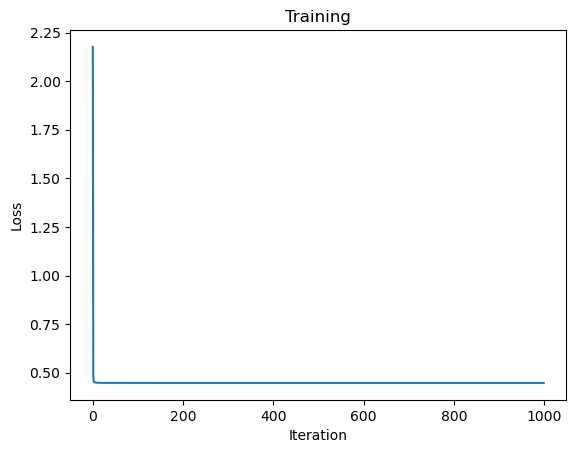

In [8]:
training_plot(1000,0.04,x,t,create_layers(1,1,[10]))